# Clustering on Sell To & Rebate Data

In [18]:
# Read the Data from S3

import boto3
import pandas as pd
from sagemaker import get_execution_role
role = get_execution_role()
bucket='apjprintsupply'
data_locationsellTo = 's3://{}/APJ_Supplies/SampleData_MVC_transformed.xlsx'.format(bucket)
sellThru=pd.read_excel(data_locationsellTo, sheet_name='Sell To & Rebates')


In [19]:
# Look at  rows to ensure data is correct
sellThru

,ResellerID,ResellerName,AccountId,CustomerName,Shipment Report Month,CountryId,SKUID,SKU Ship quantity,GROSS SELL TO (LC),TOTAL REBATES (LC),NET SELL-TO (LC),ROI
0,Reseller_ID1,Reseller Name 1,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,1,2,95.58,6.82,88.76,13.014663
1,Reseller_ID2,Reseller Name 2,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,2,3,143.37,10.23,133.14,13.014663
2,Reseller_ID3,Reseller Name 3,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,3,4,191.16,13.64,177.52,13.014663
3,Reseller_ID4,Reseller Name 4,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,4,2,56.38,4.02,52.36,13.024876
4,Reseller_ID5,Reseller Name 5,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,5,1,44.77,3.20,41.57,12.990625
5,Reseller_ID6,Reseller Name 6,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,6,1,14.31,1.02,13.29,13.029412
6,Reseller_ID7,Reseller Name 7,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,7,1,14.31,1.02,13.29,13.029412
7,Reseller_ID8,Reseller Name 8,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,8,1,14.31,1.02,13.29,13.029412
8,Reseller_ID9,Reseller Name 9,A-AU-Mun-2596123,Customer Name,2018-07-01,AU,9,1,70.08,5.01,65.07,12.988024


In [20]:
# Look at data stats
sellThru.describe()

,SKUID,SKU Ship quantity,GROSS SELL TO (LC),TOTAL REBATES (LC),NET SELL-TO (LC),ROI
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,1.777778,71.585556,5.108889,66.476667,13.015083
std,2.738613,1.092906,62.069321,4.429022,57.640301,0.015979
min,1.000000,1.000000,14.310000,1.020000,13.290000,12.988024
25%,3.000000,1.000000,14.310000,1.020000,13.290000,13.014663
50%,5.000000,1.000000,56.380000,4.020000,52.360000,13.014663
75%,7.000000,2.000000,95.580000,6.820000,88.760000,13.029412
max,9.000000,4.000000,191.160000,13.640000,177.520000,13.029412


In [21]:
#Import packages & prepare data for machine learning
import numpy as np  
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt  
%matplotlib inline
X = np.array(sellThru[['SKUID','ROI']])

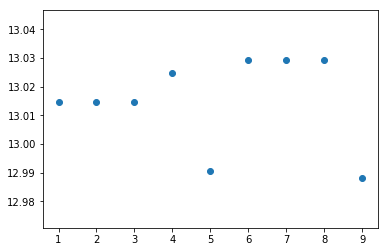

In [22]:
#Visualize Data
plt.scatter(X[:,0],X[:,1], label='True Position')  

In [25]:
# Apply k means to fit SKUs into 2 Clusters
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
print(kmeans.cluster_centers_) 

[[ 5.         13.0149708 ]
 [ 2.         13.01466276]
 [ 8.         13.01561583]]


In [27]:
print(kmeans.labels)  

[1 1 1 0 0 0 2 2 2]


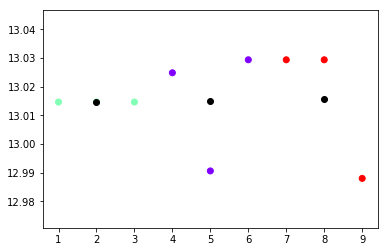

In [29]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  